# Anisotropic Poisson Problem

An anisotropic Poisson problem in a two-dimensional domain $\Omega$ is given by the strong form
$$\newcommand{\bs}{\boldsymbol}$$

\begin{align*}
-\nabla \cdot\left( \bs{A} \nabla m\right)+m &= f \quad
\:\:\text{ in }\Omega, \\ 
\bs{A} \nabla m \cdot \bs{n} &= 0  \quad \text{ on }\partial\Omega,
\end{align*}
where the conductivity tensor $\bs{A}(\bs{x})\in \mathbb{R}^{2\times
  2}$ is assumed to be symmetric and positive definite for all
$\bs{x}$, $f(\bs{x})$ is a given distributed source, and $\bs{n}$
is the unit outward normal vector to $\partial\Omega$.

## Solve BVP problem 

Choose $\Omega$ to be a unit square $[-1,1]^2$ and take the source terms to be
\begin{equation*}
f = \exp(-100(x^2+y^2)).
\end{equation*}
Use conductivity tensors $A(x)$ given by
\begin{equation*}
A_1 = \begin{pmatrix}
10 & 0\\
0  &10
\end{pmatrix}
\text{ and }
A_2 = \begin{pmatrix}
1  & -0.5\\
-0.5 &10
\end{pmatrix}
\end{equation*}

Number of unknowns =  66049


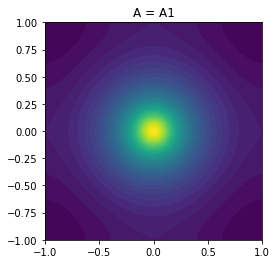

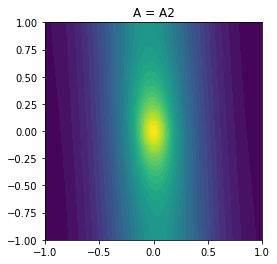

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import dolfin as dl

import math
import numpy as np
import logging

logging.getLogger('FFC').setLevel(logging.WARNING)
logging.getLogger('UFL').setLevel(logging.WARNING)
dl.set_log_active(False)


mesh = dl.RectangleMesh(dl.Point(-1,-1), dl.Point(1,1), 128, 128)


V = dl.FunctionSpace(mesh, "Lagrange", 2)
print ("Number of unknowns = ", V.dim() )

f = dl.Expression("exp(-100*(x[0]*x[0] + x[1]*x[1]))", degree = 5)

A1 = dl.Constant(((10., 0.),(0., 10.0)))
A2 = dl.Constant(((1., -.5),(-0.5, 10.0)))

m_hat = dl.TrialFunction(V)
m_tilde = dl.TestFunction(V)

a1 = dl.inner(A1*dl.grad(m_hat), dl.grad(m_tilde))*dl.dx + dl.inner(m_hat, m_tilde)*dl.dx
a2 = dl.inner(A2*dl.grad(m_hat), dl.grad(m_tilde))*dl.dx + dl.inner(m_hat, m_tilde)*dl.dx

b = dl.inner(f,m_tilde)*dl.dx

m1 = dl.Function(V)
dl.solve(a1 == b, m1)

m2 = dl.Function(V)
dl.solve(a2 == b, m2)

dl.plot(m1, title="A = A1")
plt.show()
dl.plot(m2, title="A = A2")
plt.show()